In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
from scipy.spatial import distance_matrix
from scipy import stats
from matplotlib.font_manager import FontProperties
from matplotlib import rcParams

In [2]:
GROUP = 6
MAX_PART = 14

## Evaluation Punch Card

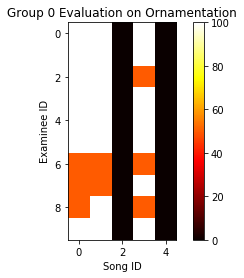

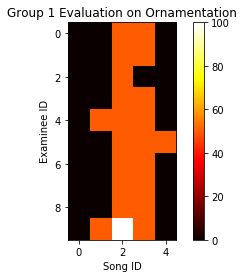

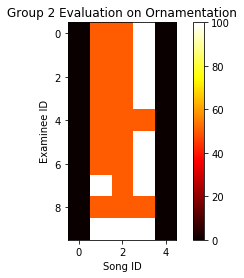

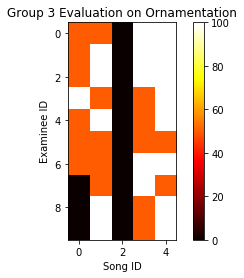

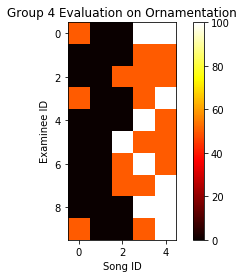

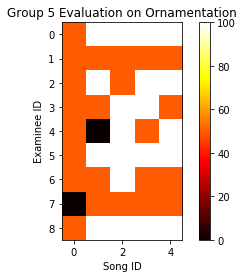

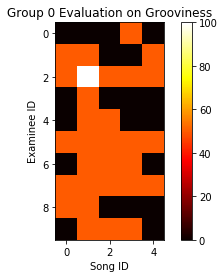

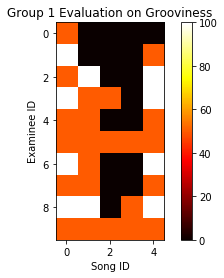

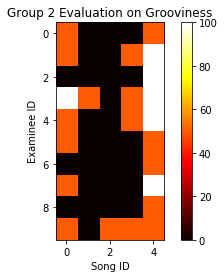

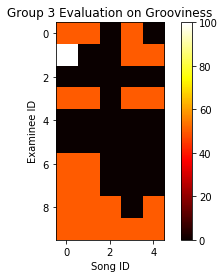

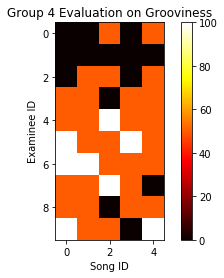

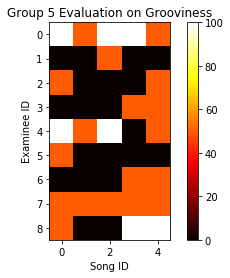

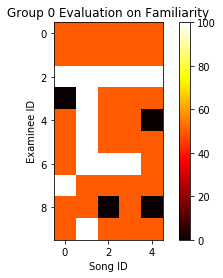

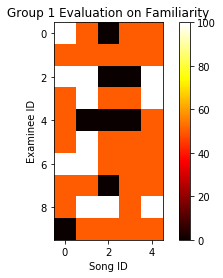

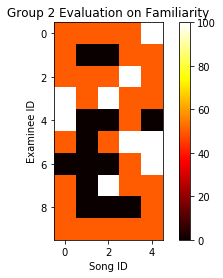

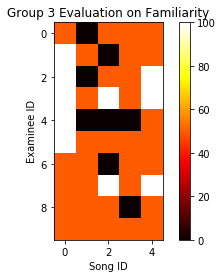

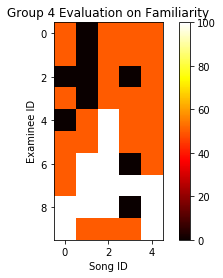

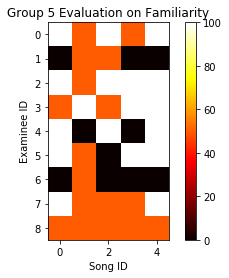

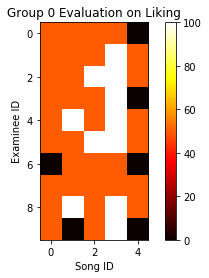

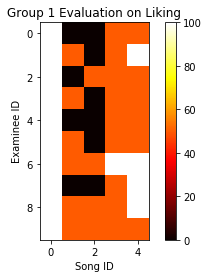

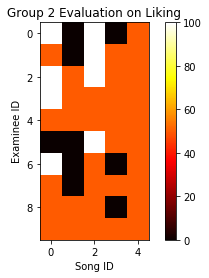

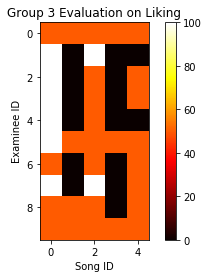

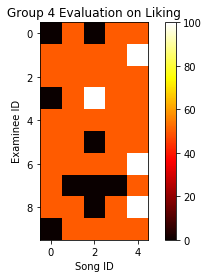

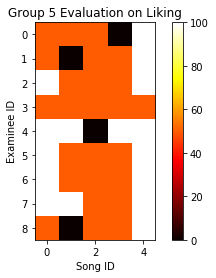

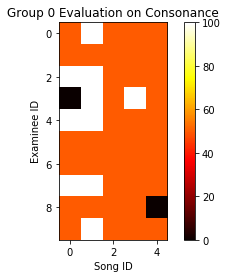

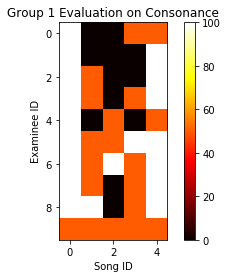

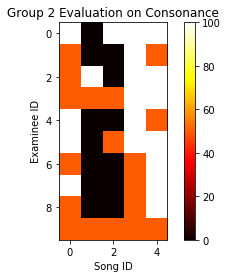

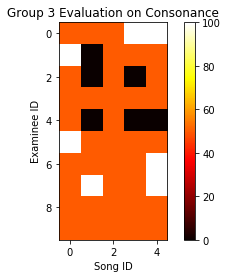

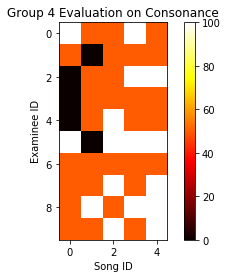

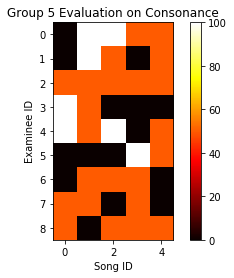

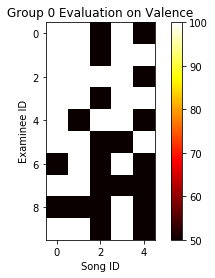

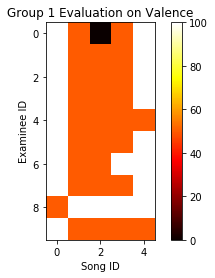

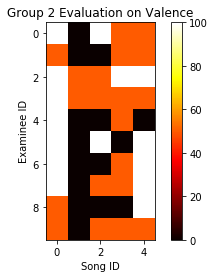

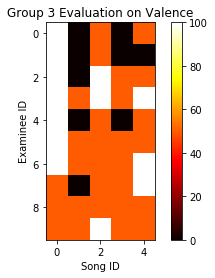

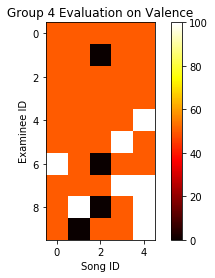

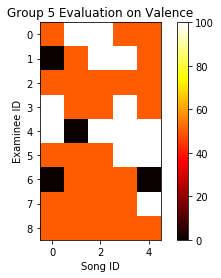

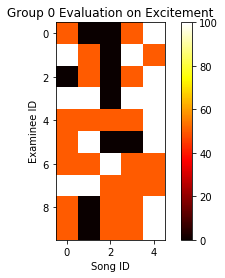

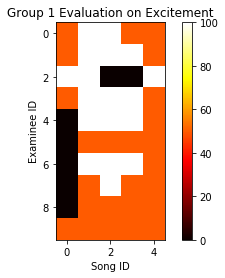

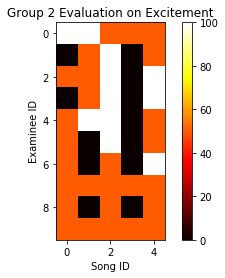

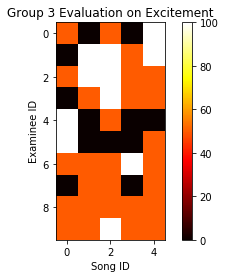

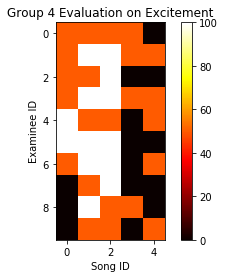

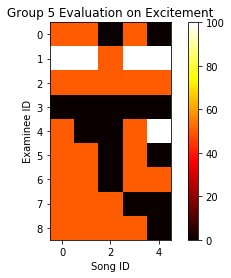

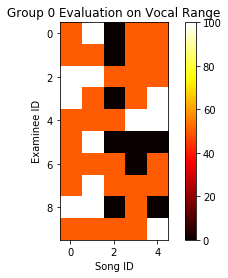

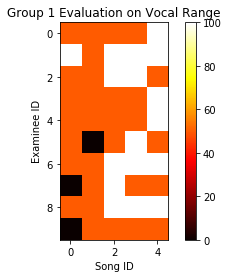

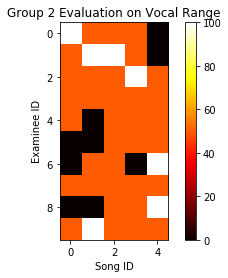

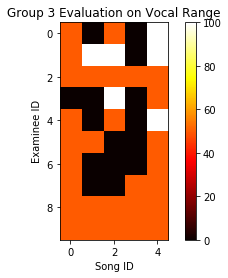

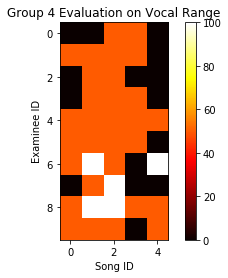

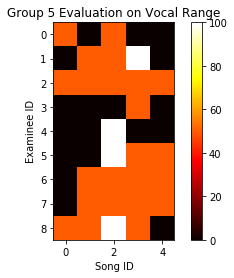

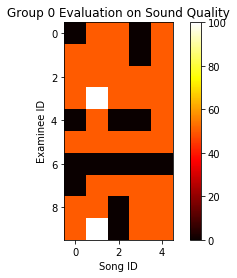

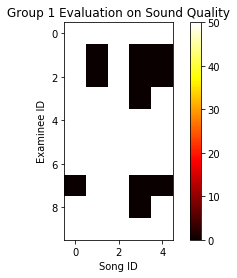

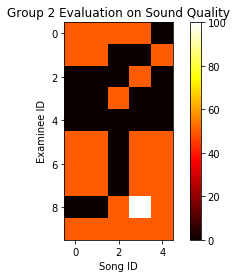

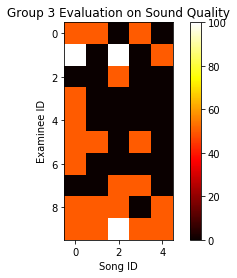

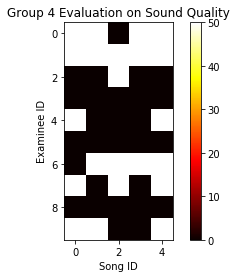

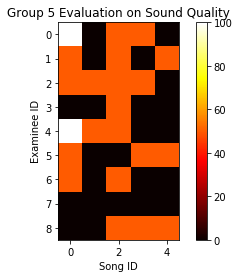

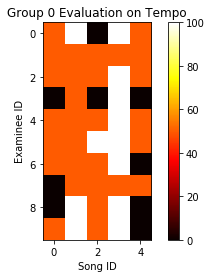

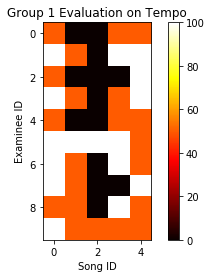

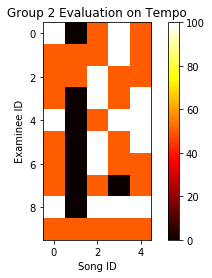

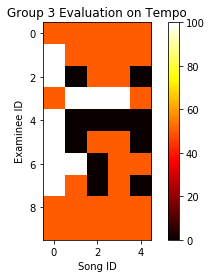

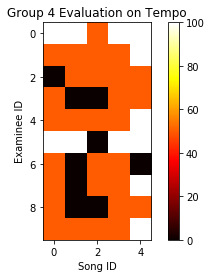

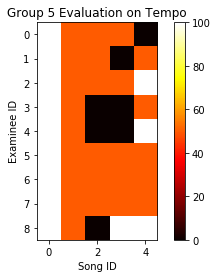

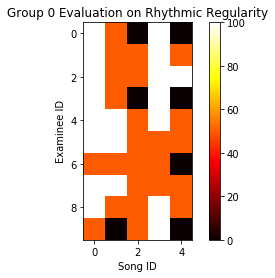

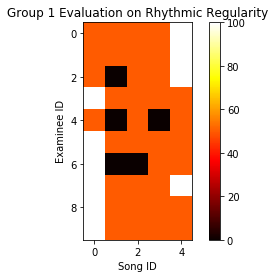

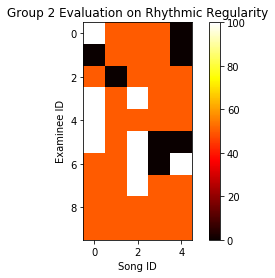

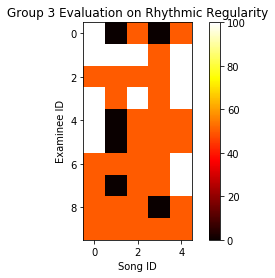

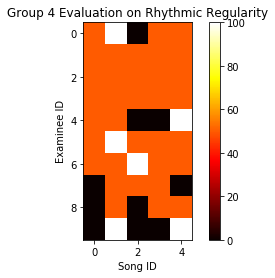

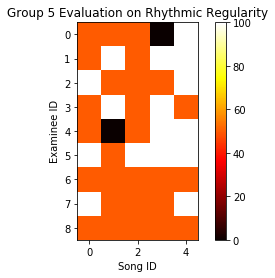

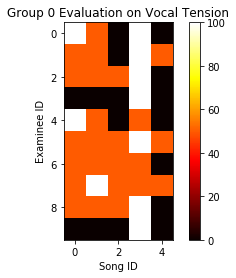

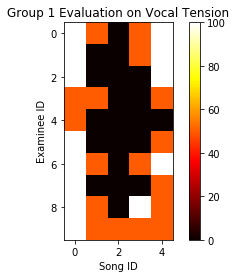

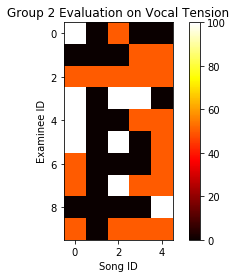

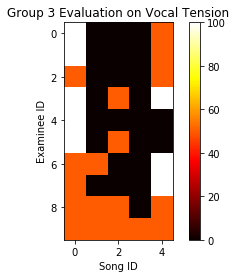

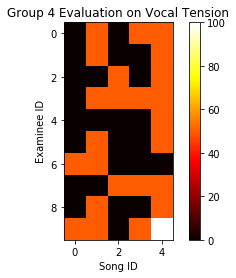

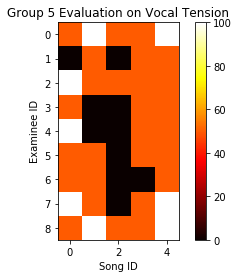

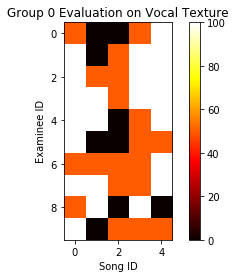

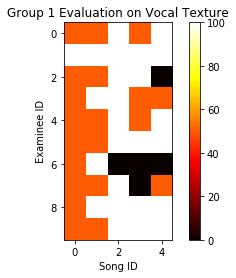

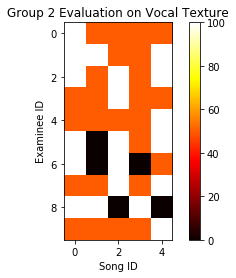

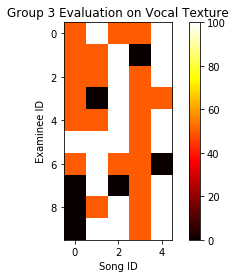

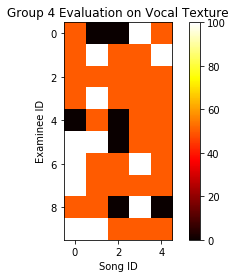

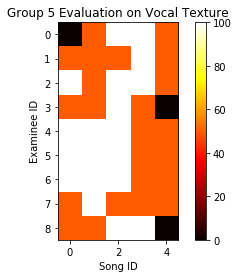

In [3]:
feature_names = ['Ornamentation', 'Grooviness', 'Familiarity', 'Liking', 'Consonance', 'Valence', 'Excitement', 'Vocal Range', 'Sound Quality', 'Tempo', 'Rhythmic Regularity', 'Vocal Tension', 'Vocal Texture']
for n in range(len(feature_names)):
    for i in range(GROUP):
        res = list()
        for j in range(MAX_PART):
            filename = './results/evaluation_' + str(i) + chr(65 + j) + '.csv'
            if not Path(filename).is_file():
                continue
            raw_data = pd.read_csv(filename, header=None).to_numpy(dtype=np.float32)[:, n + 1]
            res.append(raw_data)
        im = plt.imshow(np.array(res), cmap='hot', interpolation='nearest')
        plt.title("Group " + str(i) + " Evaluation on " + feature_names[n])
        plt.xlabel("Song ID")
        plt.ylabel("Examinee ID")
        plt.colorbar(im)
        plt.savefig("./misc/Group " + str(i) + " Evaluation on " + feature_names[n] + ".png")
        plt.show()

## Evaluation Average Distance Matrix

In [4]:
average_evaluation_matrix = np.zeros((30, 30))
for i in range(GROUP):
    count = 0
    for j in range(MAX_PART):
        filename = './results/evaluation_' + str(i) + chr(65 + j) + '.csv'
        if not Path(filename).is_file():
            continue
        count += 1
        raw_data = pd.read_csv(filename, header=None).to_numpy(dtype=np.float32)[:, 1:12]
        data = distance_matrix(raw_data, raw_data)
        data = data / np.max(data) * 100.0
        average_evaluation_matrix[i*5:(i+1)*5, i*5:(i+1)*5] += data
    average_evaluation_matrix[i*5:(i+1)*5, i*5:(i+1)*5] /= count

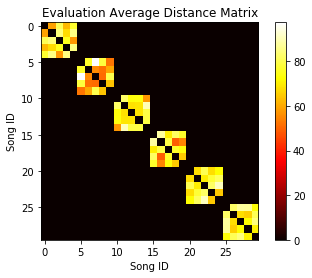

In [5]:
im = plt.imshow(average_evaluation_matrix, cmap='hot', interpolation='nearest')
plt.colorbar(im)
plt.title("Evaluation Average Distance Matrix")
plt.xlabel("Song ID")
plt.ylabel("Song ID")
plt.savefig("./misc/Evaluation Average Distance Matrix.png")
plt.show()

## Pairwise Average Distance Matrix

In [6]:
average_pairwise_matrix = np.zeros((30, 30))
for i in range(GROUP):
    count = 0
    for j in range(MAX_PART):
        filename = './results/pairwise_distance_' + str(i) + chr(65 + j) + '.csv'
        if not Path(filename).is_file():
            continue
        count += 1
        data = np.nan_to_num(pd.read_csv(filename, header=None).to_numpy(), 0)
        average_pairwise_matrix[i*5:(i+1)*5, i*5:(i+1)*5] += data
    average_pairwise_matrix[i*5:(i+1)*5, i*5:(i+1)*5] /= count

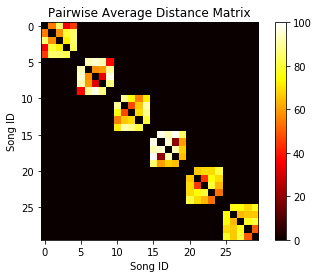

In [7]:
im = plt.imshow(average_pairwise_matrix, cmap='hot', interpolation='nearest')
plt.colorbar(im)
plt.title("Pairwise Average Distance Matrix")
plt.xlabel("Song ID")
plt.ylabel("Song ID")
plt.savefig("./misc/Pairwise Average Distance Matrix.png")
plt.show()

## Triplet Average Distance Matrix

In [8]:
average_triplet_matrix = np.zeros((30, 30))
for i in range(GROUP):
    count = 0
    for j in range(MAX_PART):
        filename = './results/triple_distance_' + str(i) + chr(65 + j) + '.csv'
        if not Path(filename).is_file():
            continue
        count += 1
        data = np.nan_to_num(pd.read_csv(filename, header=None).to_numpy(), 0)
        average_triplet_matrix[i*5:(i+1)*5, i*5:(i+1)*5] += data
    average_triplet_matrix[i*5:(i+1)*5, i*5:(i+1)*5] /= count

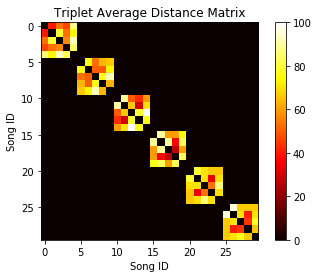

In [9]:
im = plt.imshow(average_triplet_matrix, cmap='hot', interpolation='nearest')
plt.colorbar(im)
plt.title("Triplet Average Distance Matrix")
plt.xlabel("Song ID")
plt.ylabel("Song ID")
plt.savefig("./misc/Triplet Average Distance Matrix.png")
plt.show()

## Standard Error of Groups

In [10]:
std_errs_0 = list()
for i in range(GROUP):
    result = list()
    count = 0
    for j in range(MAX_PART):
        filename = './results/evaluation_' + str(i) + chr(65 + j) + '.csv'
        if not Path(filename).is_file():
            continue
        count += 1
        raw_data = pd.read_csv(filename, header=None).to_numpy(dtype=np.float32)[:, 1:12]
        data = distance_matrix(raw_data, raw_data)
        data = data / np.max(data) * 100.0
        result.append(data)
    std_err = np.std(np.array(result))
    std_errs_0.append(std_err)
    print("Evaluation Standard Error of Group " + str(i) + ":", std_err)

Evaluation Standard Error of Group 0: 33.729134
Evaluation Standard Error of Group 1: 32.655537
Evaluation Standard Error of Group 2: 34.41731
Evaluation Standard Error of Group 3: 35.81411
Evaluation Standard Error of Group 4: 33.526188
Evaluation Standard Error of Group 5: 34.330757


In [11]:
std_errs_1 = list()
for i in range(GROUP):
    result = list()
    count = 0
    for j in range(MAX_PART):
        filename = './results/pairwise_distance_' + str(i) + chr(65 + j) + '.csv'
        if not Path(filename).is_file():
            continue
        count += 1
        raw_data = pd.read_csv(filename, header=None).to_numpy(dtype=np.float32)[:, 1:12]
        data = np.nan_to_num(pd.read_csv(filename, header=None).to_numpy(), 0).flatten()
        result.append(data)
    std_err = np.std(np.array(result))
    std_errs_1.append(std_err)
    print("Pairwise Standard Error of Group " + str(i) + ":", std_err)

Pairwise Standard Error of Group 0: 37.997894678521334
Pairwise Standard Error of Group 1: 40.207461994013
Pairwise Standard Error of Group 2: 37.91641229055901
Pairwise Standard Error of Group 3: 40.8166632639171
Pairwise Standard Error of Group 4: 35.85705502494214
Pairwise Standard Error of Group 5: 37.71465314341887


In [12]:
std_errs_2 = list()
for i in range(GROUP):
    result = list()
    count = 0
    for j in range(MAX_PART):
        filename = './results/triple_distance_' + str(i) + chr(65 + j) + '.csv'
        if not Path(filename).is_file():
            continue
        count += 1
        raw_data = pd.read_csv(filename, header=None).to_numpy(dtype=np.float32)[:, 1:12]
        data = np.nan_to_num(pd.read_csv(filename, header=None).to_numpy(), 0).flatten()
        result.append(data)
    std_err = np.std(np.array(result))
    std_errs_2.append(std_err)
    print("Triple Standard Error of Group " + str(i) + ":", std_err)

Triple Standard Error of Group 0: 36.75668960066997
Triple Standard Error of Group 1: 32.38660910932171
Triple Standard Error of Group 2: 35.77649145458509
Triple Standard Error of Group 3: 36.02404146122419
Triple Standard Error of Group 4: 35.02334469464617
Triple Standard Error of Group 5: 35.831650366680016


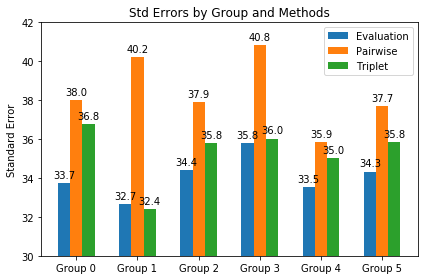

In [13]:
labels = ['Group 0', 'Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5']

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects0 = ax.bar(x - width, np.array(std_errs_0), width, label='Evaluation')
rects1 = ax.bar(x, np.array(std_errs_1), width, label='Pairwise')
rects2 = ax.bar(x + width, np.array(std_errs_2), width, label='Triplet')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Standard Error')
ax.set_title('Std Errors by Group and Methods')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.1f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects0)
autolabel(rects1)
autolabel(rects2)
ax.set_ylim([30, 42])

fig.tight_layout()
plt.savefig("./misc/Std Errors by Group and Methods.png")

plt.show()

## Evaluation Dendrogram for Each Group

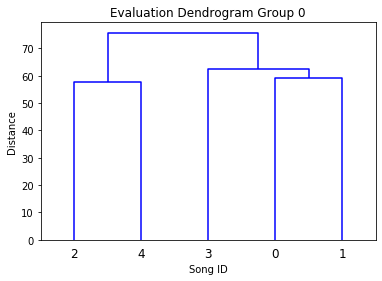

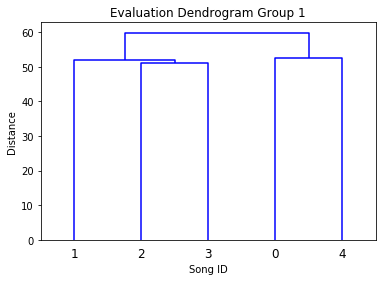

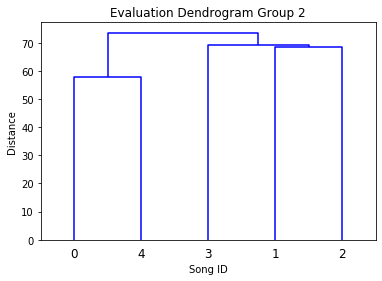

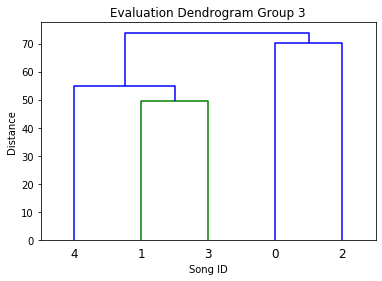

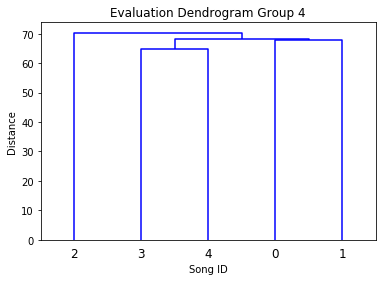

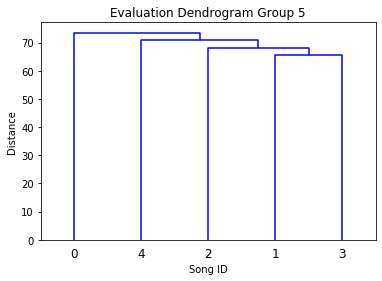

In [14]:
for i in range(GROUP):
    average_evaluation_matrix = np.zeros((5, 5))
    count = 0
    for j in range(MAX_PART):
        filename = './results/evaluation_' + str(i) + chr(65 + j) + '.csv'
        if not Path(filename).is_file():
            continue
        count += 1
        raw_data = pd.read_csv(filename, header=None).to_numpy(dtype=np.float32)[:, 1:12]
        data = distance_matrix(raw_data, raw_data)
        data = data / np.max(data) * 100.0
        average_evaluation_matrix += data
    average_evaluation_matrix /= count
    dists = squareform(average_evaluation_matrix)
    linkage_matrix = linkage(dists, "single")
    dendrogram(linkage_matrix, labels=["0", "1", "2", "3", "4"])
    plt.title("Evaluation Dendrogram Group " + str(i))
    plt.xlabel("Song ID")
    plt.ylabel("Distance")
    plt.savefig("./misc/Evaluation Dendrogram Group " + str(i) + ".png")
    plt.show()

## Pairwise Dendrogram for Each Group

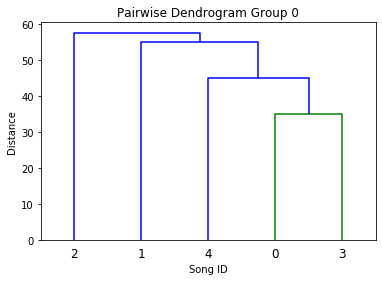

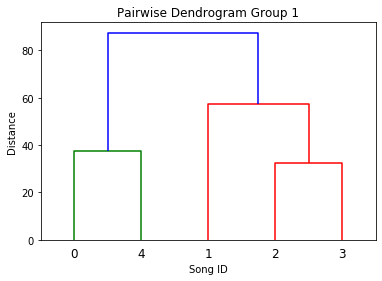

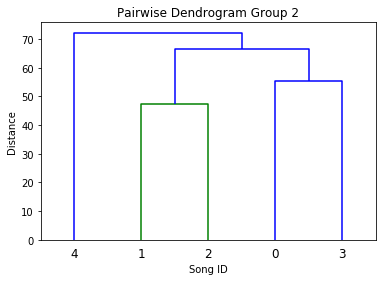

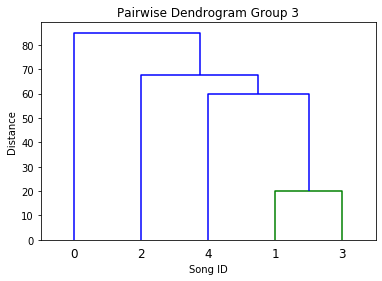

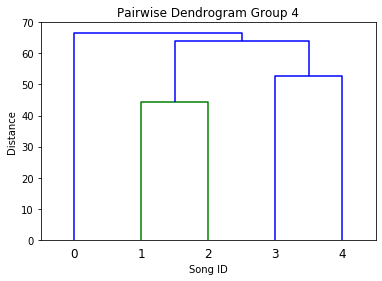

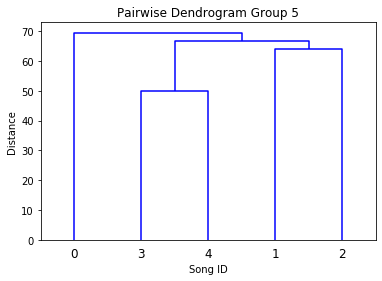

In [15]:
for i in range(GROUP):
    average_group_pairwise_matrix = np.zeros((5, 5))
    count = 0
    for j in range(MAX_PART):
        filename = './results/pairwise_distance_' + str(i) + chr(65 + j) + '.csv'
        if not Path(filename).is_file():
            continue
        count += 1
        data = np.nan_to_num(pd.read_csv(filename, header=None).to_numpy(), 0)
        average_group_pairwise_matrix += data
    average_group_pairwise_matrix /= count
    dists = squareform(average_group_pairwise_matrix)
    linkage_matrix = linkage(dists, "single")
    dendrogram(linkage_matrix, labels=["0", "1", "2", "3", "4"])
    plt.title("Pairwise Dendrogram Group " + str(i))
    plt.xlabel("Song ID")
    plt.ylabel("Distance")
    plt.savefig("./misc/Pairwise Dendrogram Group " + str(i) + ".png")
    plt.show()

## Triplet Dendrogram for Each Group

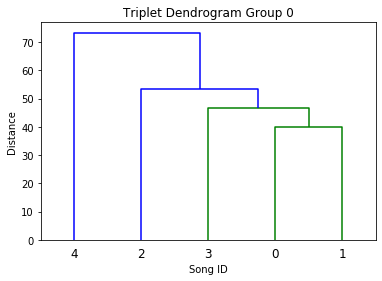

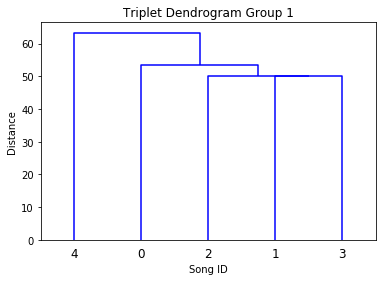

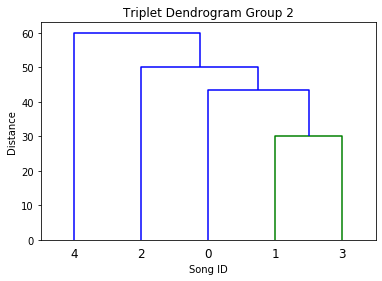

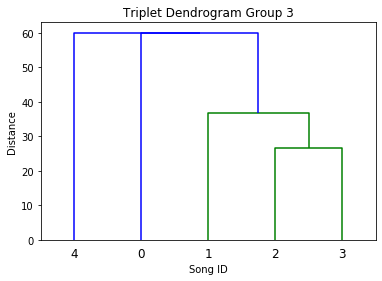

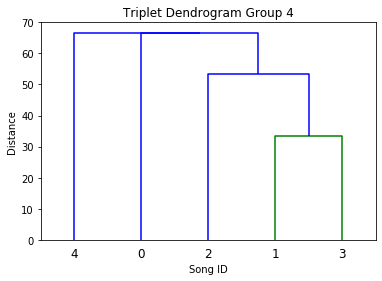

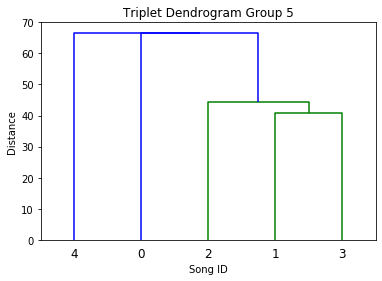

In [16]:
for i in range(GROUP):
    average_group_triplet_matrix = np.zeros((5, 5))
    count = 0
    for j in range(MAX_PART):
        filename = './results/triple_distance_' + str(i) + chr(65 + j) + '.csv'
        if not Path(filename).is_file():
            continue
        count += 1
        data = np.nan_to_num(pd.read_csv(filename, header=None).to_numpy(), 0)
        average_group_triplet_matrix += data
    average_group_triplet_matrix /= count
    dists = squareform(average_group_triplet_matrix)
    linkage_matrix = linkage(dists, "single")
    dendrogram(linkage_matrix, labels=["0", "1", "2", "3", "4"])
    plt.title("Triplet Dendrogram Group " + str(i))
    plt.xlabel("Song ID")
    plt.ylabel("Distance")
    plt.savefig("./misc/Triplet Dendrogram Group " + str(i) + ".png")
    plt.show()

## Do People Agree with Each Other in Evaluation Test? (Reliability)

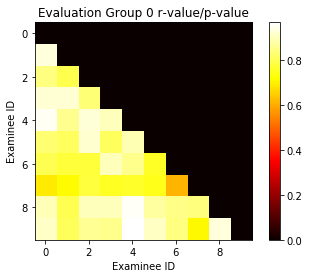

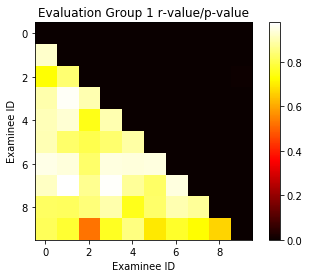

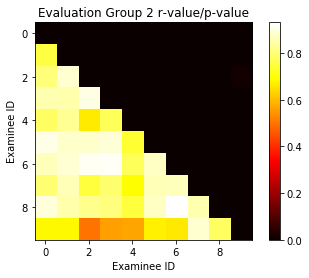

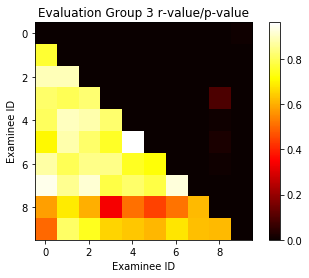

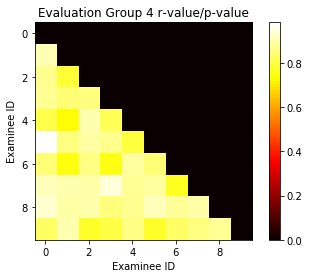

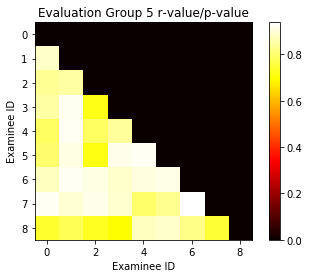

In [20]:
for i in range(GROUP):
    res = list()
    for j in range(MAX_PART):
        filename = './results/evaluation_' + str(i) + chr(65 + j) + '.csv'
        if not Path(filename).is_file():
            continue
        count += 1
        raw_data = pd.read_csv(filename, header=None).to_numpy(dtype=np.float32)[:, 1:12]
        data = distance_matrix(raw_data, raw_data)
        data = data / np.max(data) * 100.0
        res.append(data)
    r_matrix = np.zeros((len(res), len(res)))
    for x in range(len(res)):
        for y in range(len(res)):
            slope, intercept, r_value, p_value, std_err = stats.linregress(res[x].flatten(), res[y].flatten())
            r_matrix[x, y] = r_value
            r_matrix[y, x] = p_value
    im = plt.imshow(r_matrix, cmap='hot', interpolation='nearest')
    plt.title("Evaluation Group " + str(i) + " r-value/p-value")
    plt.colorbar(im)
    plt.xlabel("Examinee ID")
    plt.ylabel("Examinee ID")
    plt.savefig("./misc/Evaluation Group " + str(i) + " r-value p-value.png")
    plt.show()

## Do People Agree with Each Other in Pairwise Test? (Reliability)

In [ ]:
for i in range(GROUP):
    res = list()
    for j in range(MAX_PART):
        filename = './results/pairwise_distance_' + str(i) + chr(65 + j) + '.csv'
        if not Path(filename).is_file():
            continue
        data = np.nan_to_num(pd.read_csv(filename, header=None).to_numpy(), 0)
        res.append(data)
    r_matrix = np.zeros((len(res), len(res)))
    for x in range(len(res)):
        for y in range(len(res)):
            slope, intercept, r_value, p_value, std_err = stats.linregress(res[x].flatten(), res[y].flatten())
            r_matrix[x, y] = r_value
            r_matrix[y, x] = p_value
    im = plt.imshow(r_matrix, cmap='hot', interpolation='nearest')
    plt.title("Pairwise Group " + str(i) + " r-value/p-value")
    plt.colorbar(im)
    plt.xlabel("Examinee ID")
    plt.ylabel("Examinee ID")
    plt.savefig("./misc/Pairwise Group " + str(i) + " r-value p-value.png")
    plt.show()

## Do People Agree with Each Other in Triplet Test? (Reliability)

In [ ]:
for i in range(GROUP):
    res = list()
    for j in range(MAX_PART):
        filename = './results/triple_distance_' + str(i) + chr(65 + j) + '.csv'
        if not Path(filename).is_file():
            continue
        data = np.nan_to_num(pd.read_csv(filename, header=None).to_numpy(), 0)
        res.append(data)
    r_matrix = np.zeros((len(res), len(res)))
    p_matrix = np.zeros((len(res), len(res)))
    for x in range(len(res)):
        for y in range(len(res)):
            slope, intercept, r_value, p_value, std_err = stats.linregress(res[x].flatten(), res[y].flatten())
            r_matrix[x, y] = r_value
            r_matrix[y, x] = p_value
    im = plt.imshow(r_matrix, cmap='hot', interpolation='nearest')
    plt.title("Triplet Group " + str(i) + " r-value/p-value")
    plt.colorbar(im)
    plt.xlabel("Examinee ID")
    plt.ylabel("Examinee ID")
    plt.savefig("./misc/Triplet Group " + str(i) + " r-value p-value.png")
    plt.show()

## Do People Agree with Themselves? (Pairwise v.s. Triplet v.s. Evaluation, Individual)

In [ ]:
for i in range(GROUP):
    r_0 = list()
    r_1 = list()
    r_2 = list()
    average_group_pairwise_matrix = np.zeros((5, 5))
    count = 0
    for j in range(MAX_PART):
        filename_1 = './results/pairwise_distance_' + str(i) + chr(65 + j) + '.csv'
        filename_2 = './results/triple_distance_' + str(i) + chr(65 + j) + '.csv'
        filename_3 = './results/evaluation_' + str(i) + chr(65 + j) + '.csv'
        if not (Path(filename_1).is_file() and Path(filename_2).is_file() and Path(filename_3).is_file()):
            continue
        data_1 = np.nan_to_num(pd.read_csv(filename_1, header=None).to_numpy(), 0)
        data_2 = np.nan_to_num(pd.read_csv(filename_2, header=None).to_numpy(), 0)
        raw_data = pd.read_csv(filename_3, header=None).to_numpy(dtype=np.float32)[:, 1:12]
        data_3 = distance_matrix(raw_data, raw_data)
        data_3 = data_3 / np.max(data_3) * 100.0
        slope, intercept, r_value, p_value, std_err = stats.linregress(data_1.flatten(), data_2.flatten())
        r_0.append(r_value)
        slope, intercept, r_value, p_value, std_err = stats.linregress(data_1.flatten(), data_3.flatten())
        r_1.append(r_value)        
        slope, intercept, r_value, p_value, std_err = stats.linregress(data_2.flatten(), data_3.flatten())
        r_2.append(r_value)
    x = np.arange(len(r_0))  # the label locations
    width = 0.2  # the width of the bars

    fig, ax = plt.subplots()
    rects0 = ax.bar(x - width, np.array(r_0), width, label='Pairwise v.s. Triplet')
    rects1 = ax.bar(x, np.array(r_1), width, label='Pairwise v.s. Evaluation')
    rects2 = ax.bar(x + width, np.array(r_2), width, label='Triplet v.s. Evaluation')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('r-value')
    ax.set_title('r-values by Group and Methods in Group ' + str(i))
    ax.set_xticks(x)
    ax.legend()


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{0:.2f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects0)
    autolabel(rects1)
    autolabel(rects2)
    ax.set_ylim([0, 1])

    fig.tight_layout()
    plt.savefig('./misc/r-values by Group and Methods in Group ' + str(i) + '.png')

    plt.show()

## Do People Agree with Themselves? (Pairwise v.s. Triplet v.s Evaluation, Group Average)

In [ ]:
r_0 = list()
r_1 = list()
r_2 = list()

for i in range(GROUP):
    average_group_pairwise_matrix = np.zeros((5, 5))
    count_1 = 0
    for j in range(MAX_PART):
        filename = './results/pairwise_distance_' + str(i) + chr(65 + j) + '.csv'
        if not Path(filename).is_file():
            continue
        count_1 += 1
        data = np.nan_to_num(pd.read_csv(filename, header=None).to_numpy(), 0)
        average_group_pairwise_matrix += data
    average_group_pairwise_matrix /= count_1
    
    average_group_triplet_matrix = np.zeros((5, 5))
    count_2 = 0
    for j in range(MAX_PART):
        filename = './results/triple_distance_' + str(i) + chr(65 + j) + '.csv'
        if not Path(filename).is_file():
            continue
        count_2 += 1
        data = np.nan_to_num(pd.read_csv(filename, header=None).to_numpy(), 0)
        average_group_triplet_matrix += data
    average_group_triplet_matrix /= count_2
    
    average_evaluation_matrix = np.zeros((5, 5))
    count_3 = 0
    for j in range(MAX_PART):
        filename = './results/evaluation_' + str(i) + chr(65 + j) + '.csv'
        if not Path(filename).is_file():
            continue
        count_3 += 1
        raw_data = pd.read_csv(filename, header=None).to_numpy(dtype=np.float32)[:, 1:12]
        data = distance_matrix(raw_data, raw_data)
        data = data / np.max(data) * 100.0
        average_evaluation_matrix += data
    average_evaluation_matrix /= count_3
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(average_group_pairwise_matrix.flatten(), average_group_triplet_matrix.flatten())
    print("Group " + str(i) + ":", "r-value:", "%.2f" % r_value, "p-value:", "%.10f" % p_value, "std_err:", "%.2f" % std_err)
    r_0.append(r_value)
    slope, intercept, r_value, p_value, std_err = stats.linregress(average_group_pairwise_matrix.flatten(), average_evaluation_matrix.flatten())
    print("Group " + str(i) + ":", "r-value:", "%.2f" % r_value, "p-value:", "%.10f" % p_value, "std_err:", "%.2f" % std_err)
    r_1.append(r_value)
    slope, intercept, r_value, p_value, std_err = stats.linregress(average_evaluation_matrix.flatten(), average_group_triplet_matrix.flatten())
    print("Group " + str(i) + ":", "r-value:", "%.2f" % r_value, "p-value:", "%.10f" % p_value, "std_err:", "%.2f" % std_err)
    r_2.append(r_value)
    print()

In [ ]:
labels = ['Group 0', 'Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5']

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects0 = ax.bar(x - width, np.array(r_0), width, label='Pairwise v.s. Triplet')
rects1 = ax.bar(x, np.array(r_1), width, label='Pairwise v.s. Evaluation')
rects2 = ax.bar(x + width, np.array(r_2), width, label='Triplet v.s. Evaluation')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('r-value')
ax.set_title('r-values by Group and Methods')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects0)
autolabel(rects1)
autolabel(rects2)
ax.set_ylim([0.75, 1])

fig.tight_layout()
plt.savefig('./misc/r-values by Group and Methods.png')

plt.show()

## Comments

- Triplet Experiments always have a relatively low stardard means comparing to pairwise tests, which means a small set of samples could make sense.
- Feature evaluation can reach the highest agreement if the examinees have good experience in music.
- Even the differences between individuals are the highest when using the pairwise method. The average distance matrix is still stable with enough datasets.